In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [65]:
df = pd.read_csv("/content/predictive_maintenance.csv")

In [66]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [67]:
#df = df.drop(["UDI","Product ID"],axis = 1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [69]:
# changing data type of `Target` column?
df["Target"] = df['Target'].astype(object)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  object 
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


In [71]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000


In [72]:
#check missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [73]:
import seaborn as sns

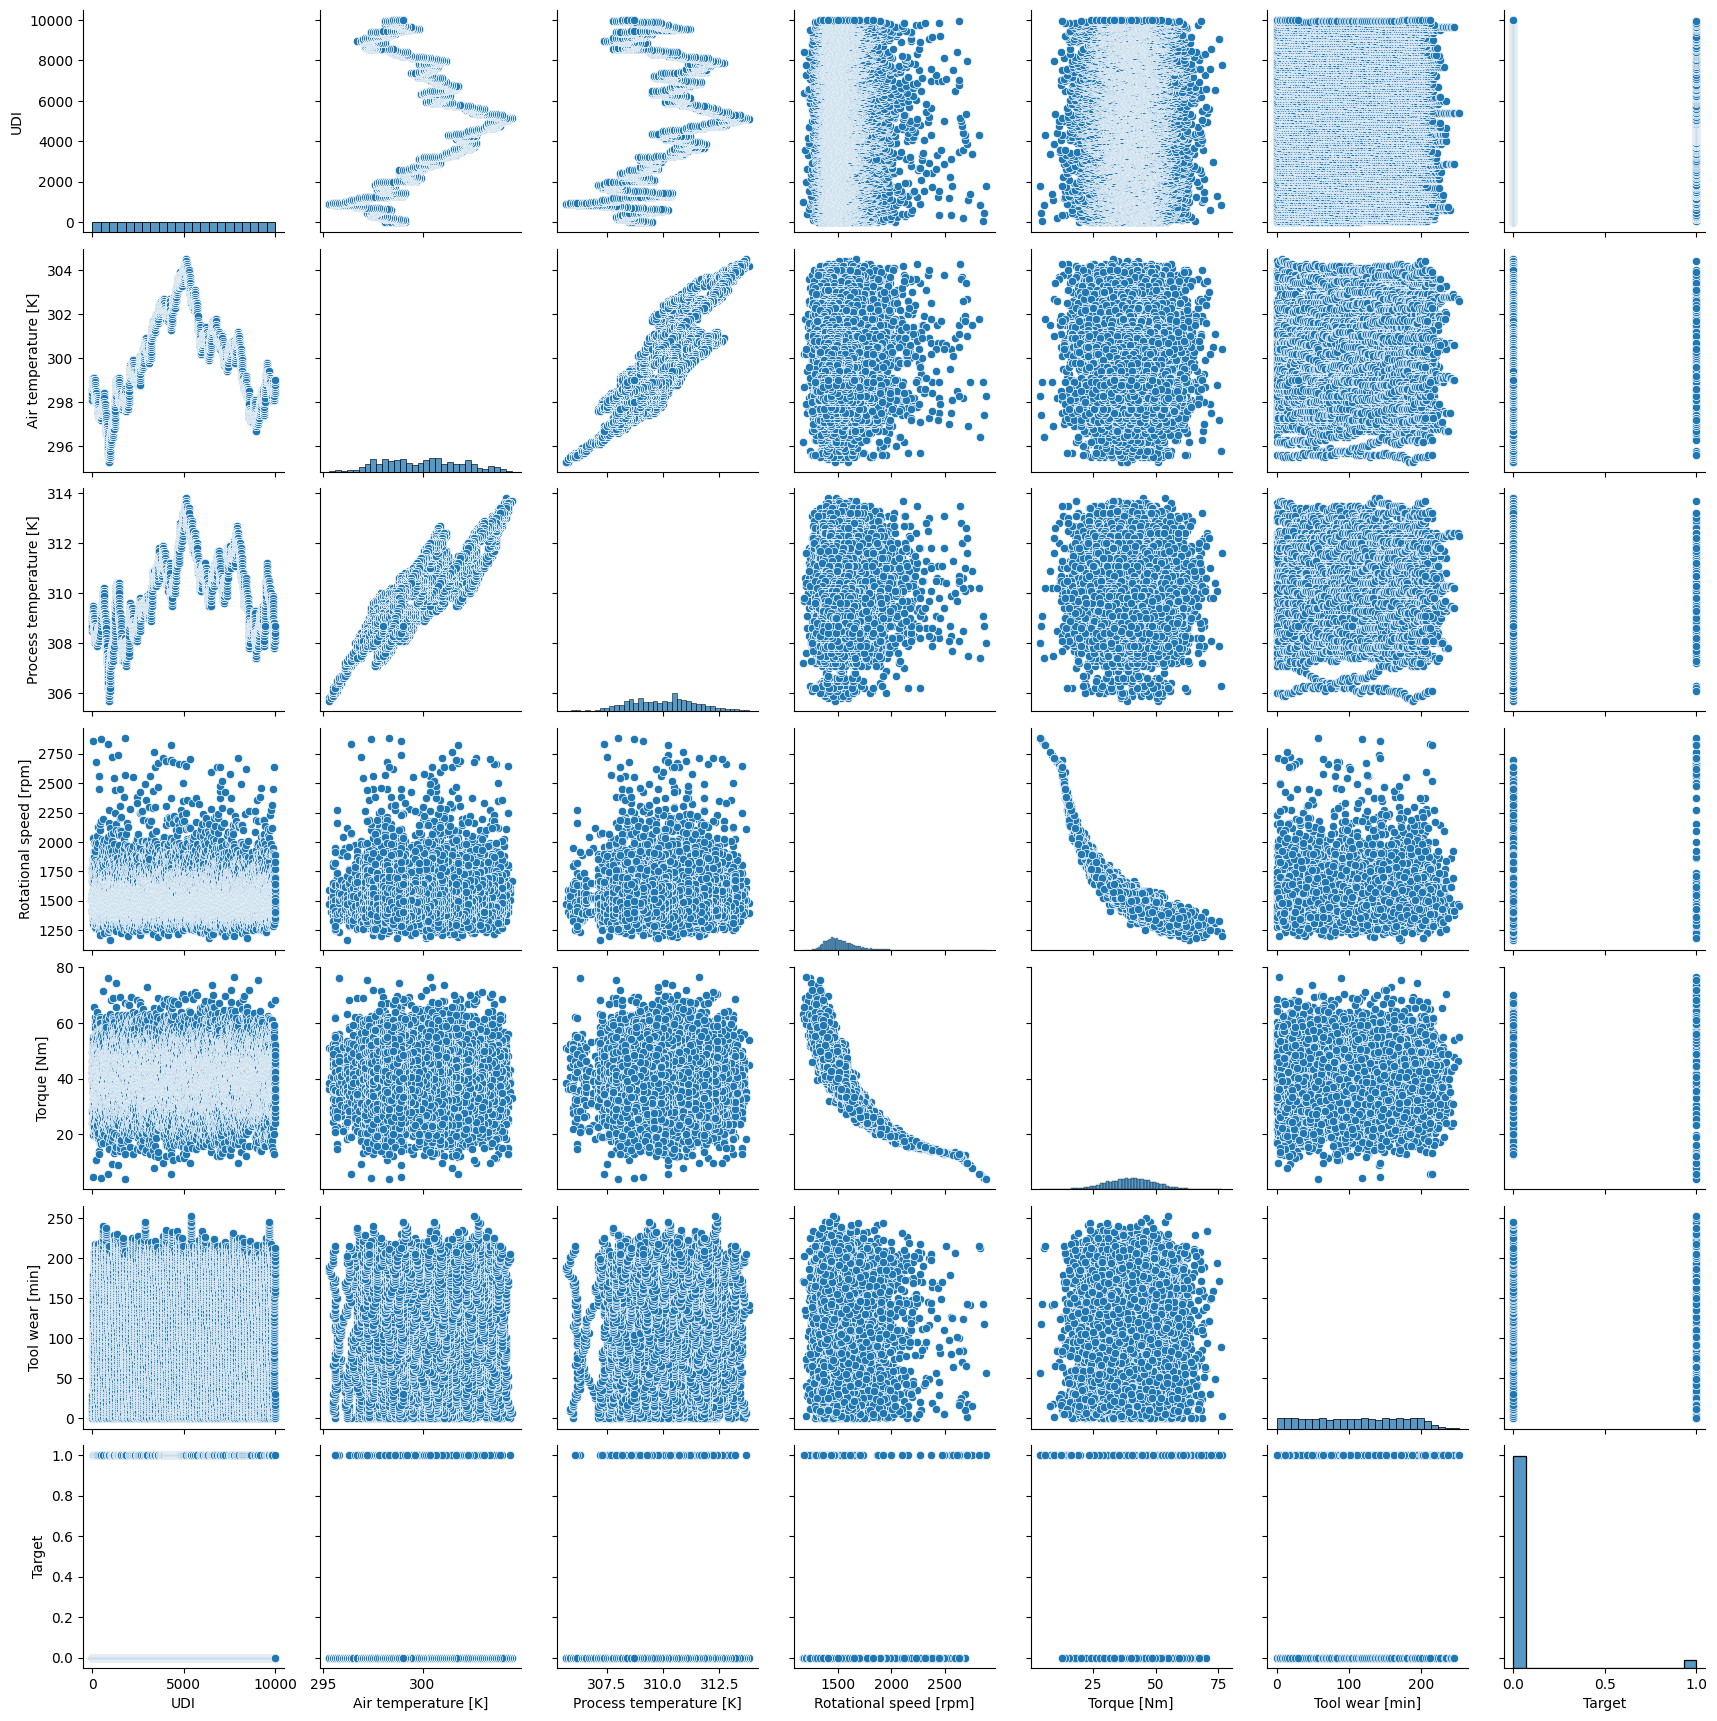

In [74]:
sns.pairplot(df)

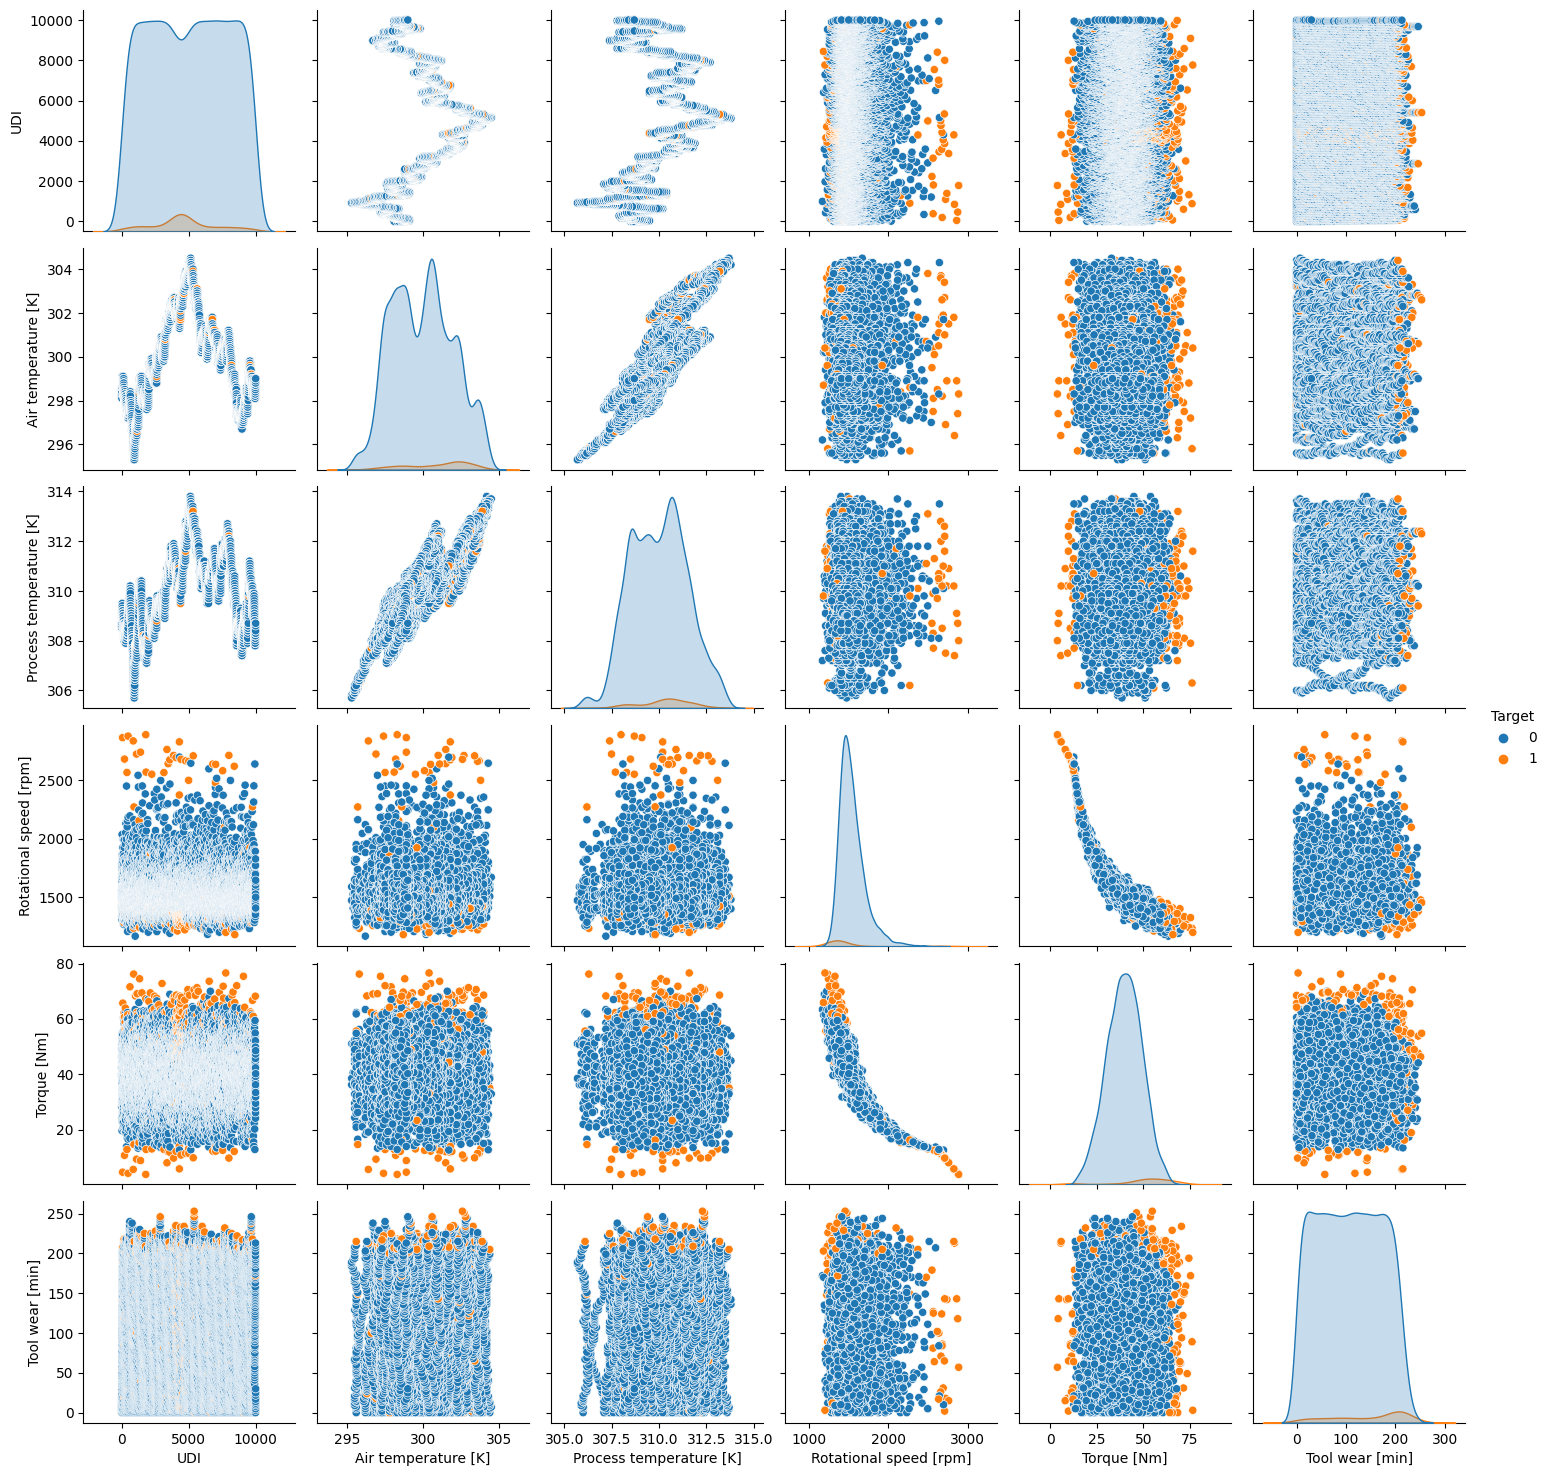

In [75]:
sns.pairplot(df , hue = 'Target')

In [76]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [77]:
#df.columns[-2:]

In [78]:
# Separate features (X) and target (y)
X = df.drop(columns=['Target', 'UDI', 'Product ID', 'Failure Type'])
y = df['Target']

In [79]:
categories_col = ['Type']
numbers_col = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Apply data transformation using ColumnTransformer
encod = OneHotEncoder(handle_unknown='ignore')
stdscl = StandardScaler()

coltransf = ColumnTransformer(
    [('encoding', encod, categories_col),
     ('scaling', stdscl, numbers_col)],
    remainder='passthrough'
)

X_transformed = coltransf.fit_transform(X)

In [81]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.9735
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.67      0.26      0.38        61

    accuracy                           0.97      2000
   macro avg       0.82      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000

[[1931    8]
 [  45   16]]


In [85]:
from sklearn.svm import SVC

# Create and train the Support Vector Machine model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.977
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.86      0.30      0.44        61

    accuracy                           0.98      2000
   macro avg       0.92      0.65      0.71      2000
weighted avg       0.97      0.98      0.97      2000

[[1936    3]
 [  43   18]]


In [86]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9815
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.82      0.51      0.63        61

    accuracy                           0.98      2000
   macro avg       0.90      0.75      0.81      2000
weighted avg       0.98      0.98      0.98      2000

[[1932    7]
 [  30   31]]


In [87]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only to avoid data leakage
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [88]:
from sklearn.ensemble import VotingClassifier

# Initialize the best performing models
logistic_model = LogisticRegression()
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Set probability to True for VotingClassifier
rf_model = RandomForestClassifier(random_state=42)

In [89]:
# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('svm', svm_model), ('rf', rf_model)],
    voting='soft'  # Use soft voting to get probabilities for decision making
)

In [90]:
# Train the Voting Classifier on the resampled data
voting_classifier.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [91]:
# Evaluate the ensemble model on the test set
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)
print(classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1939
           1       0.23      0.82      0.36        61

    accuracy                           0.91      2000
   macro avg       0.61      0.87      0.65      2000
weighted avg       0.97      0.91      0.93      2000

[[1770  169]
 [  11   50]]
